### Description

This project involves analyzing a healthcare dataset to predict strokes in patients. The dataset includes information like age, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, smoking status, and gender. Each entry represents a patient, and the features capture stroke-related risk factors.

The dataset we'll be using includes various features related to patients' health and lifestyle. Each row represents a unique patient and includes attributes such as age, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, smoking status, and gender. The dataset also includes a target variable 'stroke' representing the occurrence of a stroke.

### Task 

Develope predictive model that can effectively forecast the occurrence of a stroke based on the provided features.

### To Do

Here's a brief overview of our workflow for this project:

1. **Data Loading and Preprocessing:** 
Load the data and preprocess it for analysis and modeling. This includes handling missing values, converting categorical variables into dummy/indicator variables, and handling class imbalance. 

2. **Discriptive Data Analysis:** 
Perform exploratory data analysis to gain insights into the dataset, understand the distributions of features, and explore potential relationships between the features and the stroke outcome. 

3. **Data Cleaning:** 
Perform imputing missing values and data transformation to improve the model's performance.

4. **Model Training and Validation:** 
Train the model using a train-test split strategy and make predictions on the test set. 

5. **Model Evaluation:** 
Evaluate the performance of the trained model using appropriate evaluation metrics such as confusion matrix, ROC curve, and Precision-Recall curve, and assess the model's ability to generalize to unseen data using the test set.

6. **Prediction:** 
Use the trained model to make predictions on new, unseen data. If applicable, deploy the model for practical use or further analysis. 

This workflow provides a structured approach to analyzing the dataset, building a predictive model, and evaluating its performance. By following this workflow, we can gain insights into the dataset, develop an accurate predictive model, and make informed decisions based on the model's predictions. 


## What is in DATASET?  

- **`age`**: This is the age of the patient. Age is a crucial factor in stroke prediction as the risk of stroke increases with age. According to the World Health Organization, the risk of stroke doubles every decade after the age of 55. 

- **`hypertension`**: This is a binary feature indicating whether the patient has hypertension (high blood pressure) or not. Hypertension is a significant risk factor for stroke as it can damage blood vessels, making them prone to blockage or rupture.

- **`heart_disease`**: This binary feature indicates whether the patient has heart disease or not. Patients with heart diseases are at a higher risk of stroke as these conditions can lead to the formation of clots in the heart that can travel to the brain. ❤️

- **`ever_married`**: This feature represents whether the patient is married or not. Although not a direct risk factor for stroke, marital status can be associated with lifestyle factors that influence stroke risk. For instance, married individuals might have different stress levels, physical activity patterns, or dietary habits compared to their unmarried counterparts. 

- **`work_type`**: This categorical feature describes the type of occupation of the patient. Certain occupations might be associated with higher stress levels or sedentary behavior, which can influence stroke risk.

- **`Residence_type`**: This feature indicates whether the patient lives in a rural or urban area. The place of residence might be associated with stroke risk due to factors like access to healthcare, air quality, lifestyle habits, etc. 

- **`avg_glucose_level`**: This feature represents the average glucose level in the patient's blood. High blood glucose levels can damage blood vessels, leading to an increased risk of stroke.

- **`bmi`**: This is the Body Mass Index of the patient, calculated as weight in kilograms divided by the square of height in meters. A high BMI indicates obesity, which is a significant risk factor for stroke as it can lead to or exacerbate conditions like hypertension, high blood glucose, and heart disease. 

- **`smoking_status`**: This categorical feature indicates whether the patient is a smoker, former smoker, or never smoked. Smoking can increase stroke risk as it can damage blood vessels, increase blood pressure, and reduce the amount of oxygen reaching the brain.

- **`gender`**: This feature represents the gender of the patient. Gender can influence stroke risk due to biological differences and gender-specific lifestyle patterns.


This study presents a detailed examination and modeling of a healthcare dataset with the primary aim of predicting stroke incidence at the patient level .

The exploratory data analysis highlighted significant differences in the distribution of stroke and no-stroke cases, illustrating the impact of various health and lifestyle factors on stroke risk. We also encountered missing data in the 'bmi' feature, emphasizing the necessity for effective missing data imputation methods  in healthcare prediction tasks.

We used the power of gradient boosting, specifically the xboost, to predict stroke occurrence. The model was rigorously trained and validated using a train-test split strategy, delivering remarkable results on several performance metrics.

The stroke predictions produced by the model were evaluated using a confusion matrix, ROC curve, and Precision-Recall curve, providing a comprehensive view of the model's performance . This approach highlights the importance of utilizing multiple evaluation metrics in imbalanced classification tasks .

This project underscores the potential of machine learning  in healthcare prediction tasks, providing insights that could aid in patient risk assessment , healthcare planning , and strategy formulation in clinical settings . Future work could focus on refining the prediction model, exploring different strategies for class balancing , and integrating additional patient data  to enhance the accuracy and comprehensiveness of stroke predictions .


### DATA LOADING 

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D


# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

For the descriptive data analysis, we will proceed with the following steps:

1. **Univariate Analysis:**e'll inspect each variable individually to understand its distribution and potential outliers.

2. **variate Analysis:**e'll explore the relationship between each variable and the target variable stroke.

3. **ltivariate Analysis:**e'll study the interactions between different variables and how they collectively relate to the target variable stroke.

## Univariate Analysis

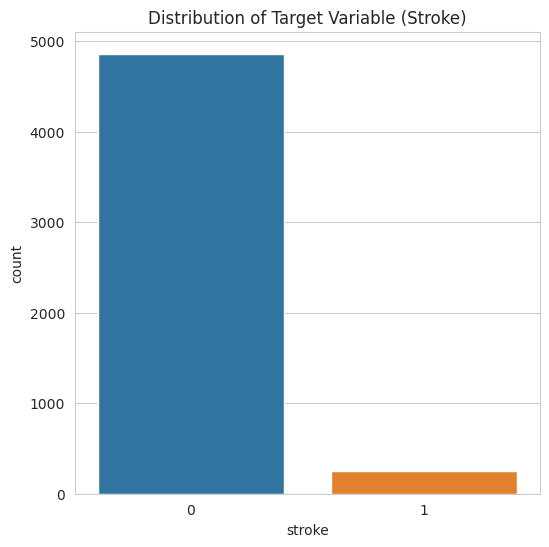

In [4]:
# Set the style of all graphs to seaborn
sns.set_style("whitegrid")

# Plot the target variable 'stroke'
plt.figure(figsize=(6, 6))
sns.countplot(x=data['stroke'])
plt.title('Distribution of Target Variable (Stroke)')
plt.show()

The target variable '**stroke**' is highly imbalanced with a lot more instances of class **0** (no stroke) than class **1** (stroke). This is an important observation as it will affect the choice of machine learning model and evaluation metric.

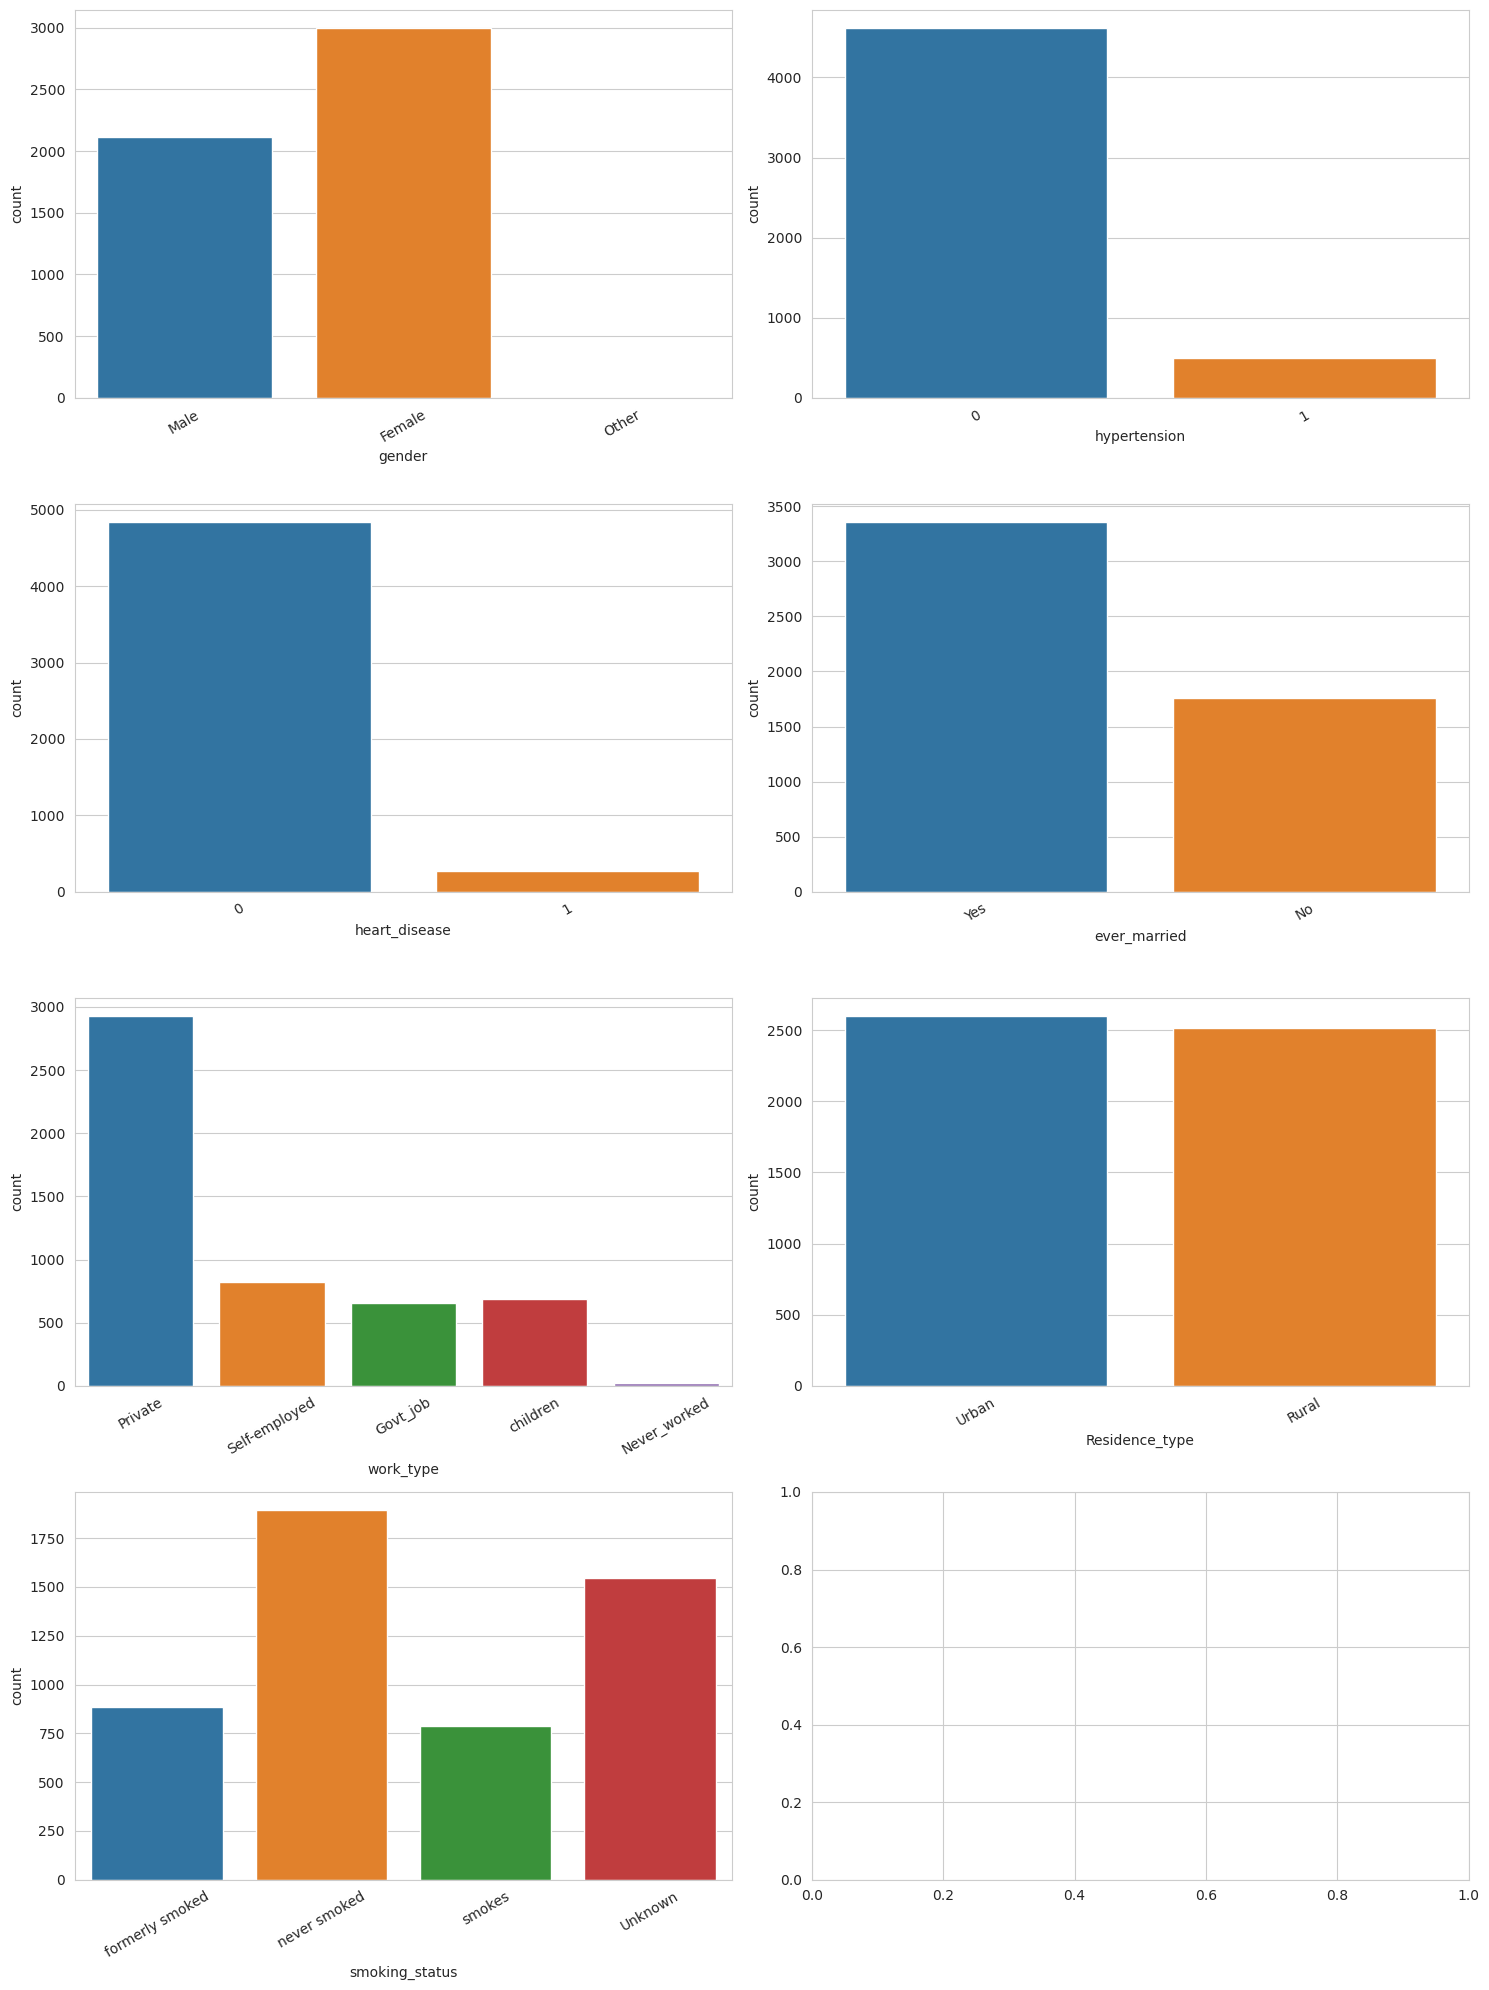

In [5]:
# List of categorical variables
categorical_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plotting the bar plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=var, data=data, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

plt.tight_layout()
plt.show()

- **gender**: There are more `female` than `male` patients, and a very small number of patients identify as `Other`. 

- **hypertension**: The majority of patients do not have `hypertension`

- **heart_disease**: The majority of patients do not have `heart disease`

- **ever_married**: Most of the patients have been `married at least once`

- **work_type**: Most of the patients are in the `Private` work category. There are also significant numbers in `Self-employed` and `children`. The categories `Govt_job` and `Never_worked` have fewer patients.

- **Residence_type**: The number of patients living in `urban` and `rural areas` is almost equal.

- **smoking_status**: Most of the patients have `never smoked`. The categories `formerly smoked` and `smokes` have fewer patients. There's a significant portion of patients with `Unknown` smoking status.


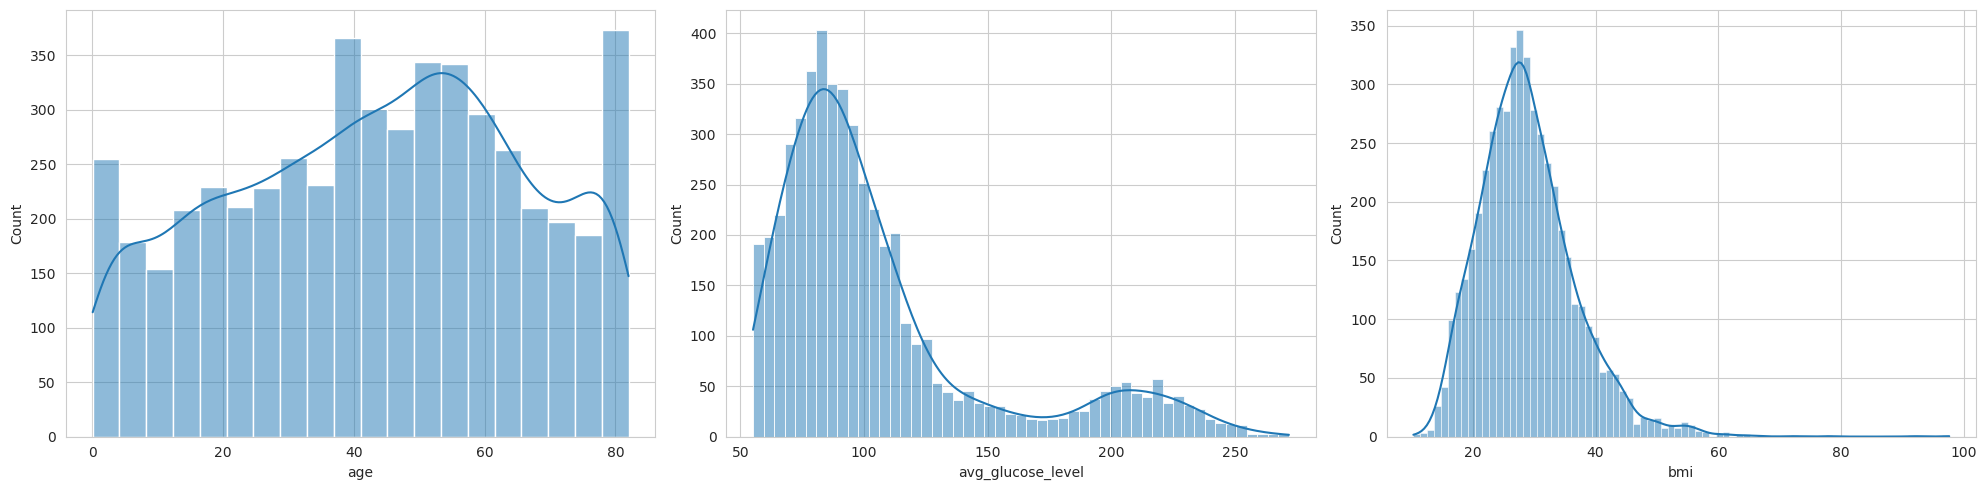

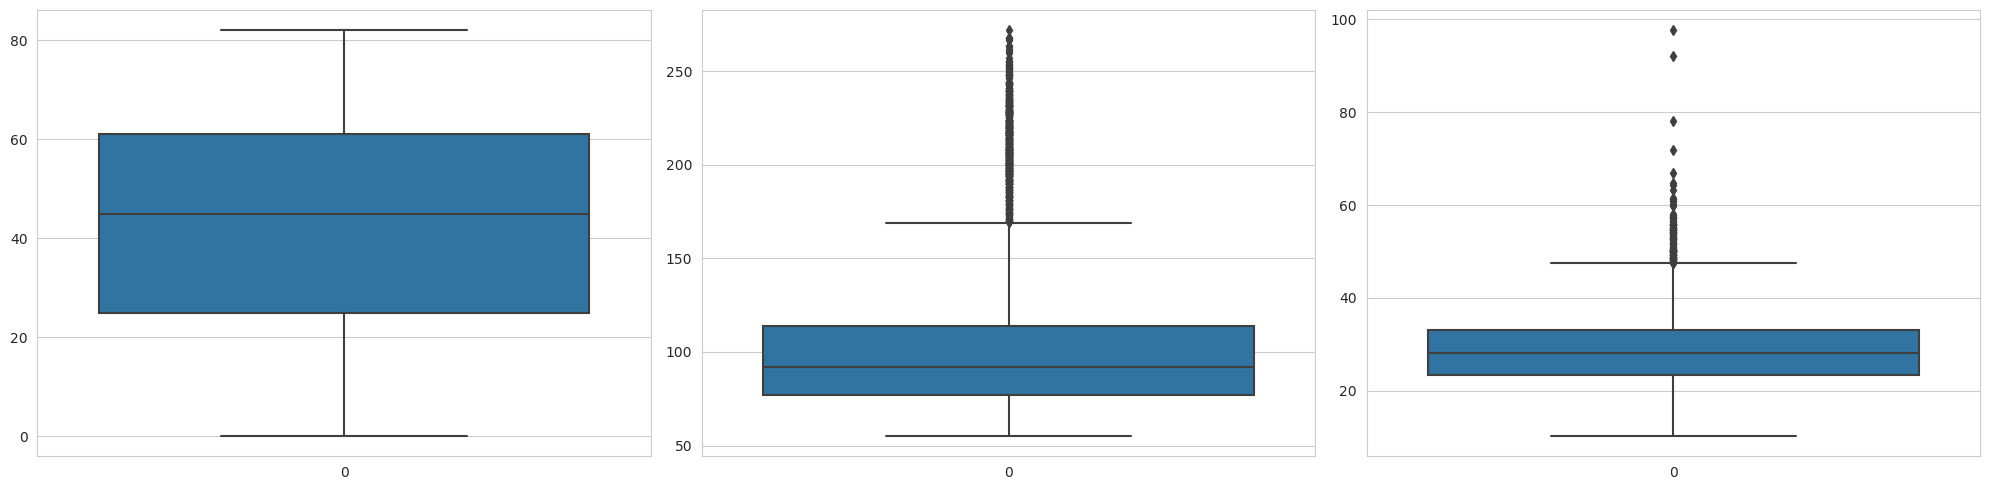

In [6]:
# List of continuous variables
continuous_variables = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(data[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(data[var], ax=subplot)

plt.tight_layout()
plt.show()

- **age**: The age of the patients varies from young to old, with the majority of patients being in the range of **40-80 years**.

- **avg_glucose_level**: Most patients have an average glucose level in the range of **50-125**, but there are also many patients with higher levels. The distribution is right-skewed.

- **bmi**: The majority of patients have a BMI in the range of **20-40**, which is considered normal to overweight. There are some outliers with extremely high BMI values.


## Bivariate Analysis 

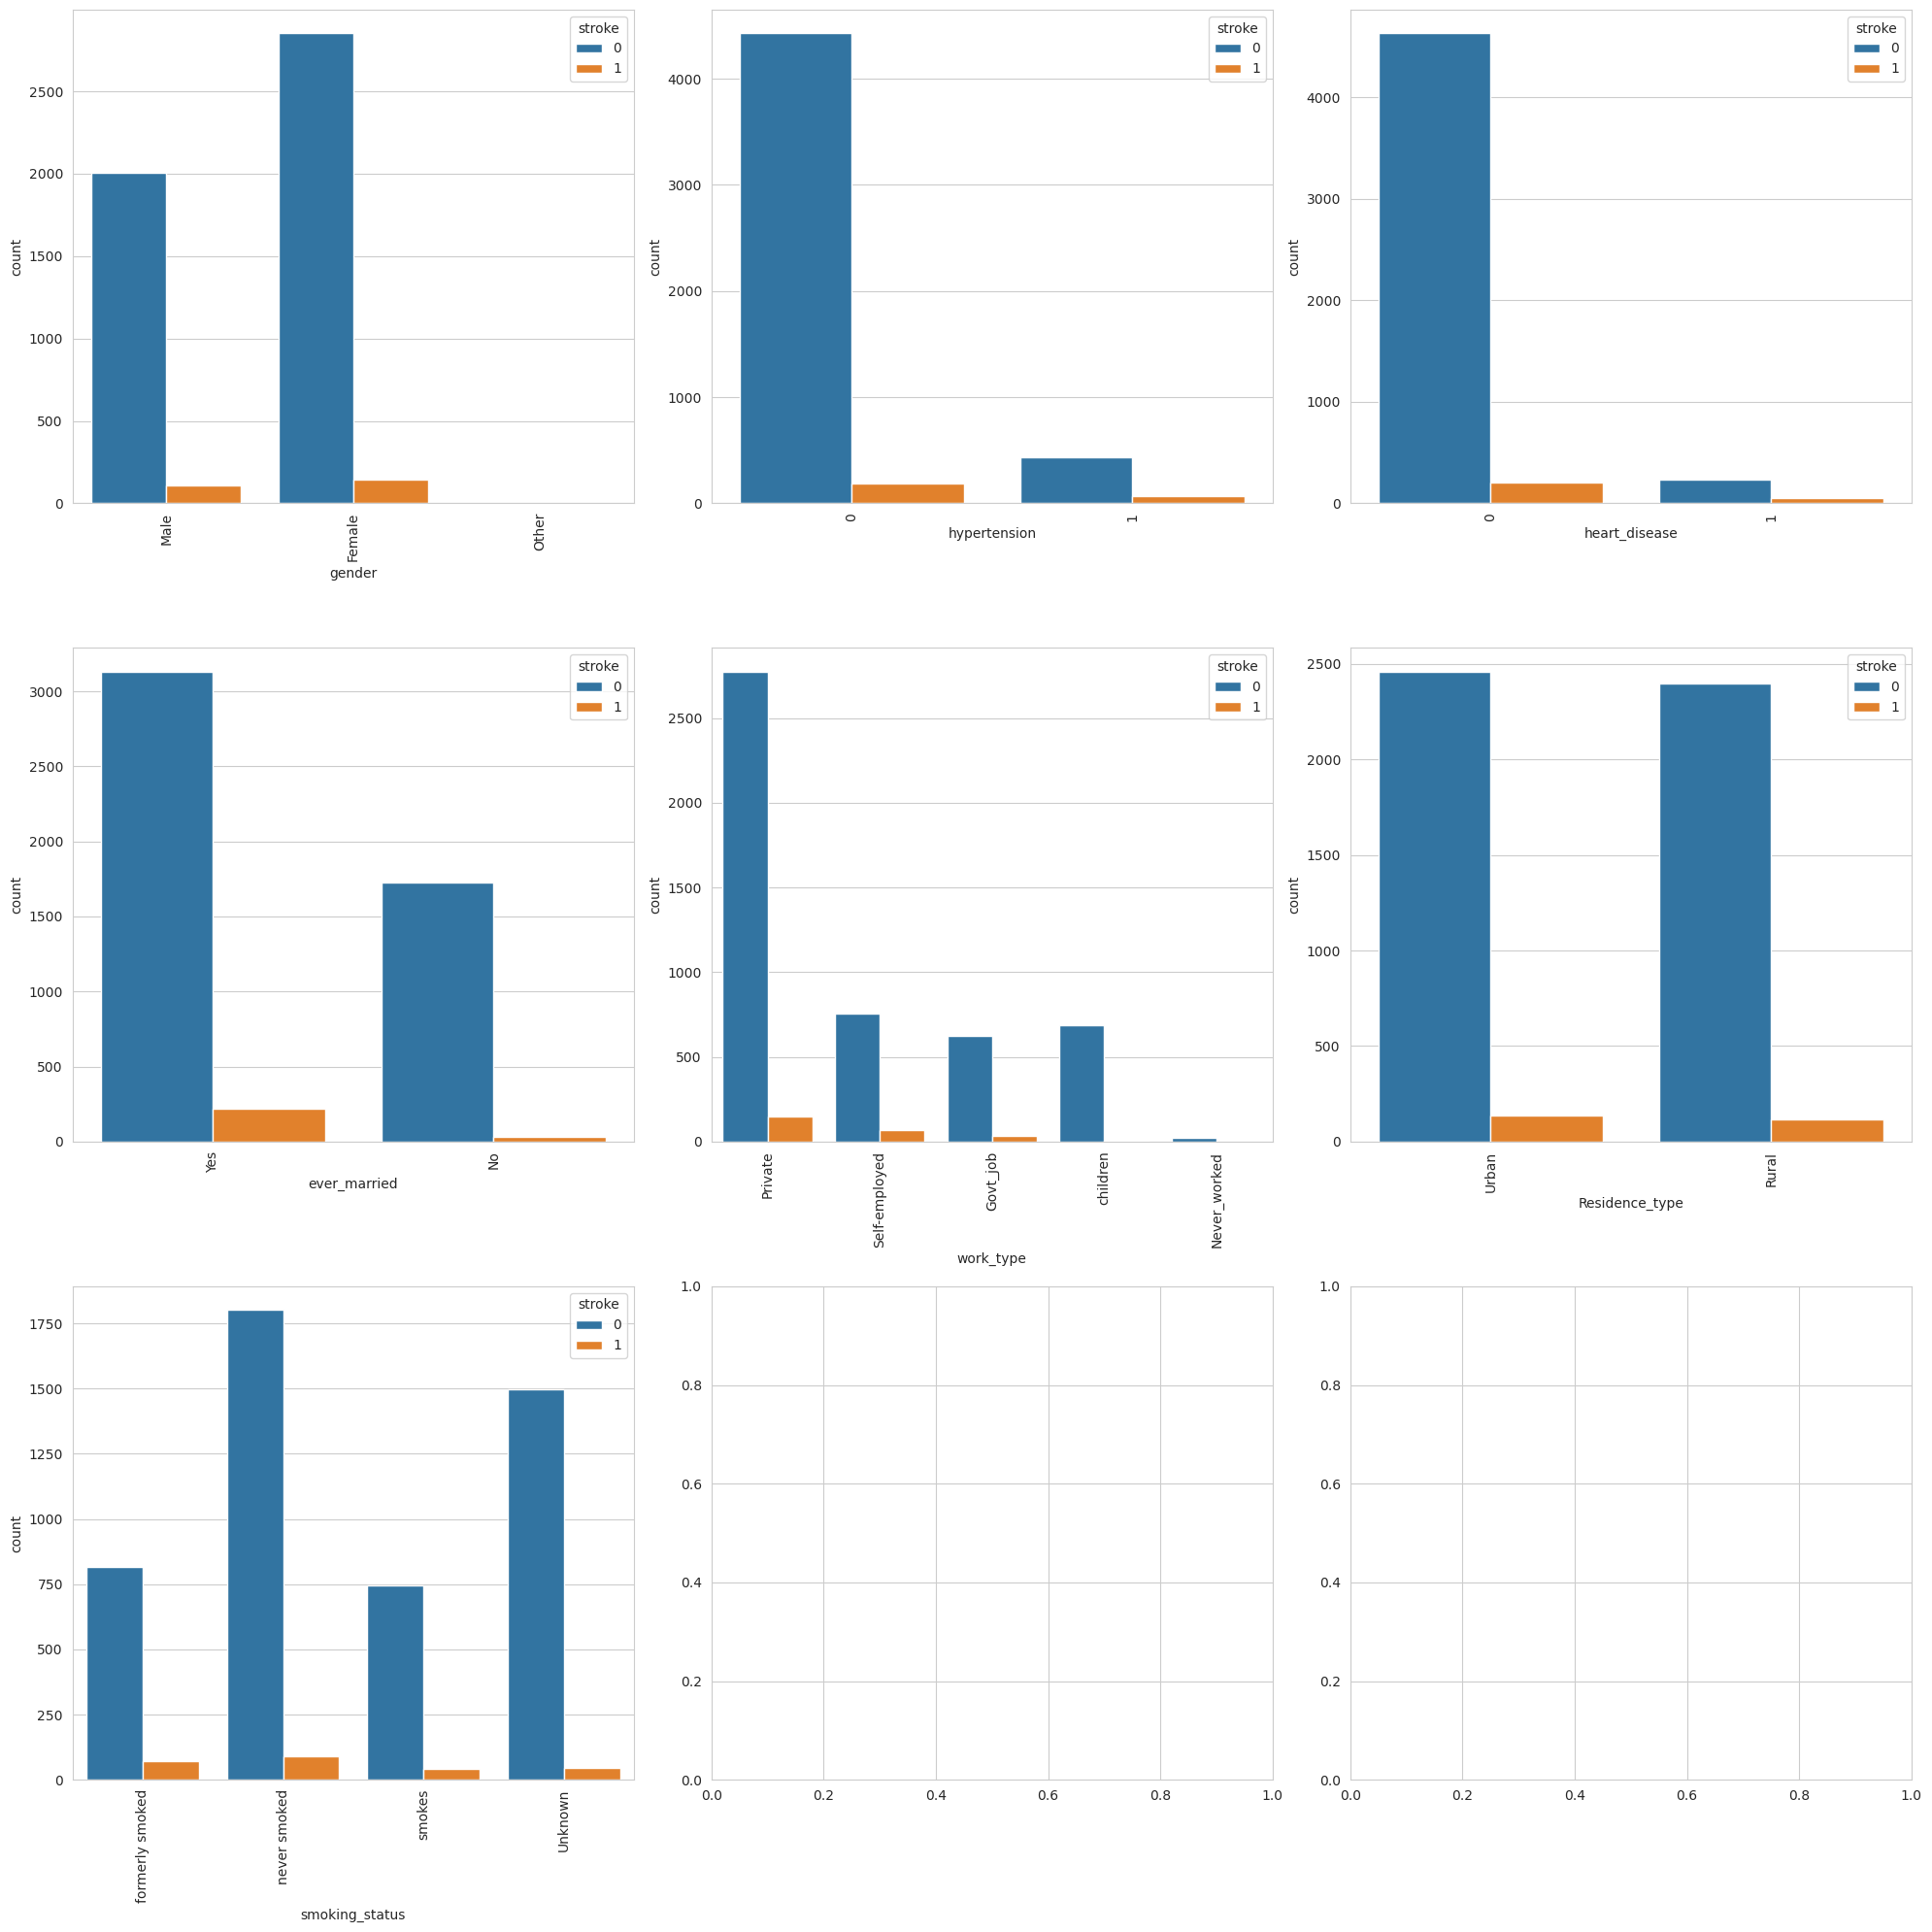

In [7]:
# Plot the categorical variables against the target variable 'stroke'
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=data[var], hue=data['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

- **gender**: Both `males` and `females` have a similar proportion of stroke cases, with males having slightly more. The `Other` category has no stroke cases, but this could be due to the very small sample size for this category. 

- **hypertension**: Patients with `hypertension` have a **higher** proportion of stroke cases than those without hypertension.

- **heart_disease**: Patients with `heart disease` also have a **higher** proportion of stroke cases than those without heart disease.

- **ever_married**: Those who have been ``married`` have a **higher** proportion of stroke cases than those who have not.

- **work_type**: Patients who are `self-employed` or work in `private jobs` have a **higher proportion** of stroke cases compared to other work types.

- **Residence_type**: The proportion of stroke cases is almost **equal** for both `urban` and `rural` residents. 

- **smoking_status**: The proportion of stroke cases is **higher** for patients who `formerly smoked` or `currently smoke` compared to those who never smoked. The stroke proportion for the 'Unknown' category is lower.


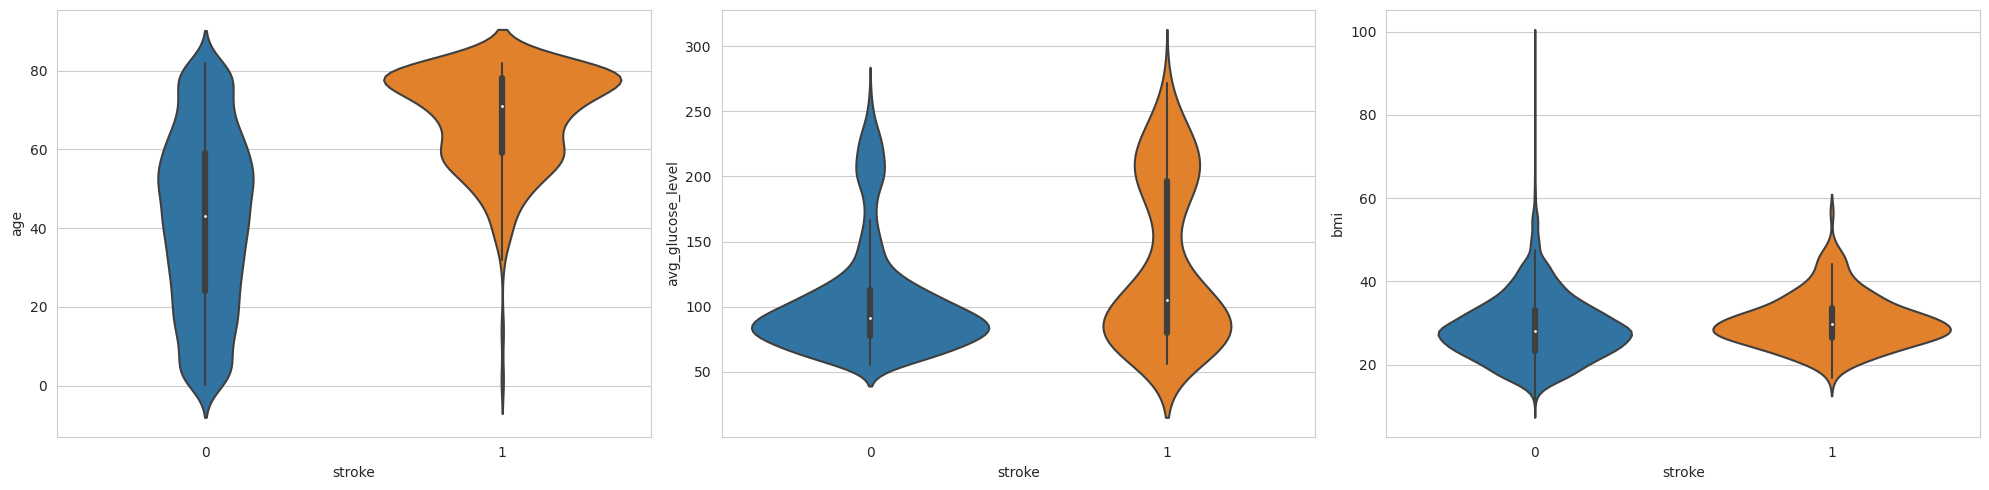

In [8]:
# Plot the continuous variables against the target variable 'stroke'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.violinplot(x=data['stroke'], y=data[var], ax=subplot)

plt.tight_layout()
plt.show()

observations from the bivariate analysis with the continuous variables:

- **age**: Stroke cases are more common in older patients. The median age of stroke patients appears to be higher than that of non-stroke patients.

- **avg_glucose_level**: Stroke patients seem to have a higher average glucose level than non-stroke patients. There is a wider distribution of glucose levels among stroke patients.

- **bmi**: The BMI distributions for stroke and non-stroke patients are quite similar, suggesting that BMI might not be a strong predictor for stroke. 

## Multivariate Analysis

In [10]:
# Re-load the original dataset
data_original = pd.read_csv('healthcare-dataset-stroke-data.csv')
data_original = data_original.drop("id",axis=1)

# Select categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply one-hot encoding to the categorical columns
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(data_original[categorical_cols])

# Convert the one-hot encoded array into a dataframe
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the dataset
data_original.drop(categorical_cols, axis=1, inplace=True)

# Concatenate the original dataframe with the one-hot encoded dataframe
data_one_hot_encoded = pd.concat([data_original, one_hot_encoded_df], axis=1)

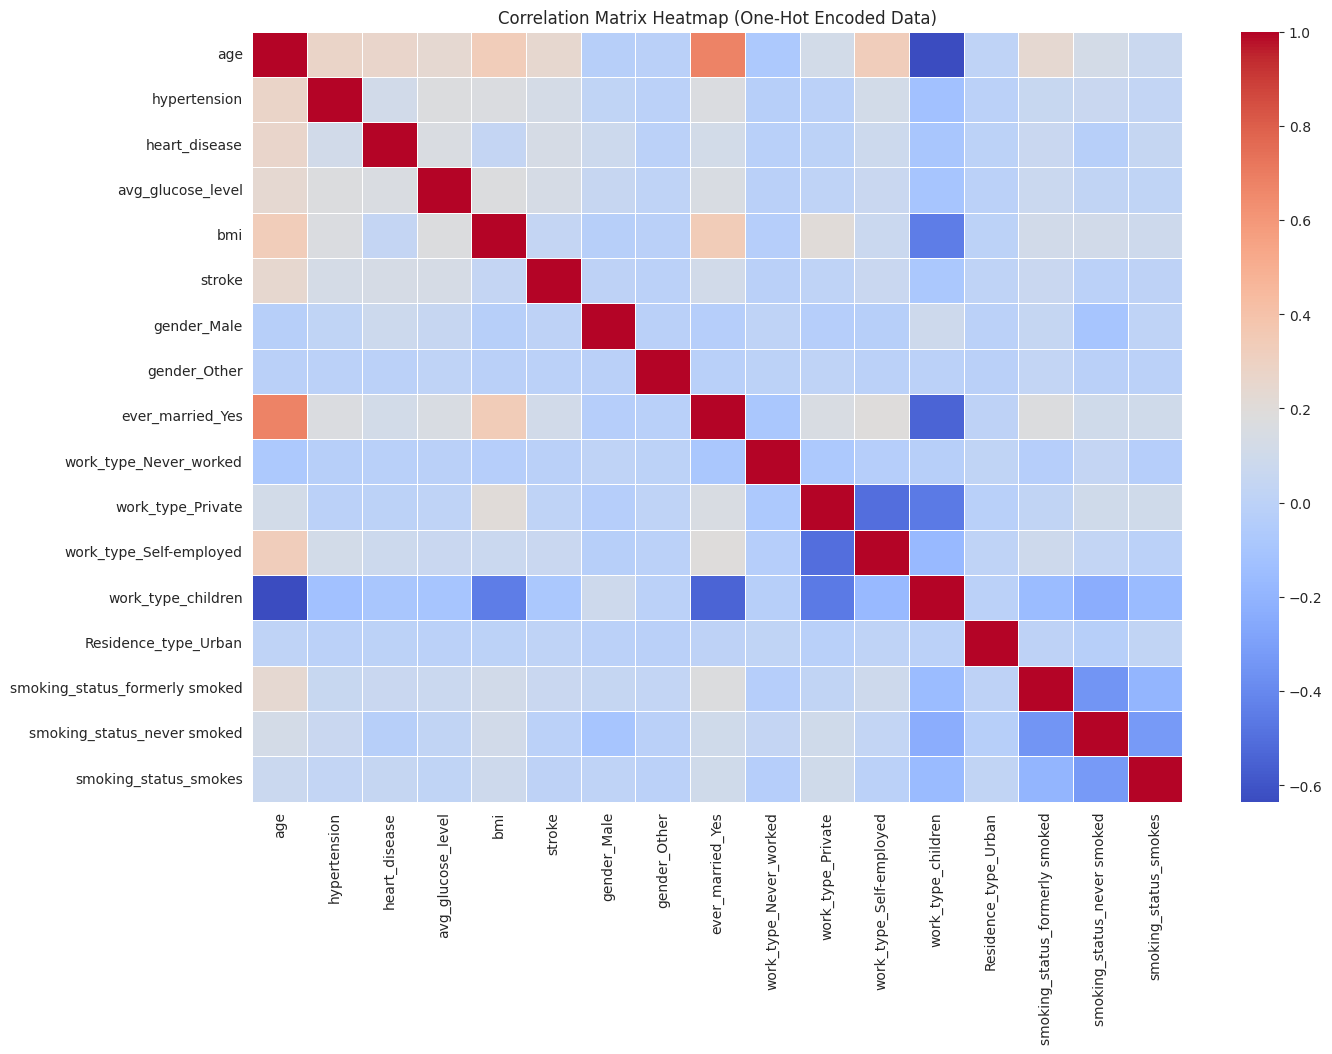

In [11]:
# Compute the correlation matrix for the one-hot encoded data
correlation_matrix_one_hot = data_one_hot_encoded.corr()

# Plot the heatmap for the entire correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_one_hot, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (One-Hot Encoded Data)")
plt.show()

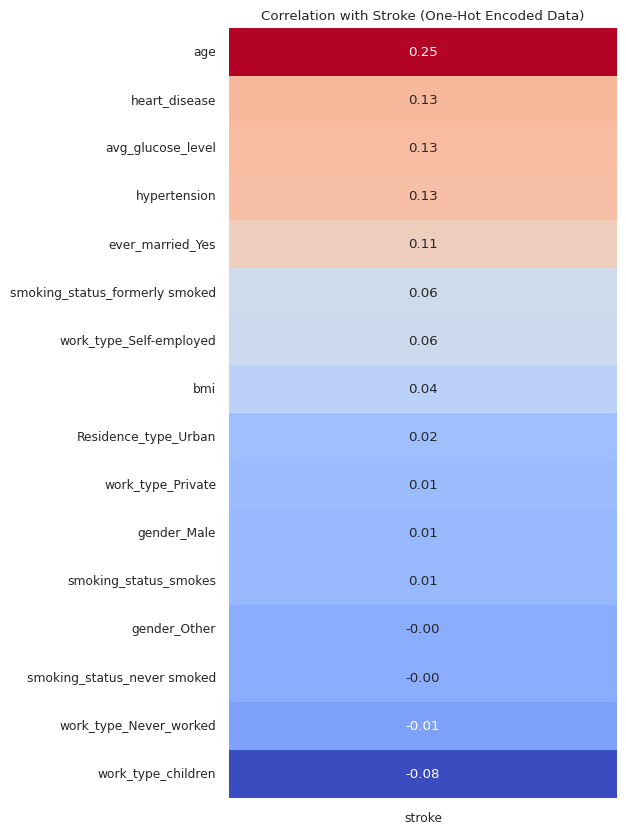

In [12]:
# Compute the correlation of each feature with the target variable 'stroke'
target_corr_one_hot = correlation_matrix_one_hot['stroke'].drop('stroke')

# Sort correlation values in descending order
target_corr_sorted_one_hot = target_corr_one_hot.sort_values(ascending=False)

# Plot a heatmap of the correlations with the target column
plt.figure(figsize=(5, 10))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted_one_hot.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Stroke (One-Hot Encoded Data)')
plt.show()

**Correlation Heatmap** : The first heatmap provides a visualization of the correlation between all pairs of features in the dataset. The color of each cell represents the correlation coefficient between the pair of variables: 🔵 for positive correlation and 🔴 for negative correlation. The darker the color, the stronger the correlation.

**Correlation with the Target Variable 'Stroke'** : The second heatmap ranks the features based on their correlation with the target variable `stroke`.

From the second heatmap, we can make several observations:

1.  The `age` feature shows the highest positive correlation with the `stroke` target variable. This suggests that older people might be at a higher risk of having a stroke, which aligns with known medical observations.

2. The `hypertension` and `heart_disease` features also have positive correlations with `stroke`, indicating that people with hypertension or heart disease could be more likely to have a stroke.

3. `avg_glucose_level` and 💍 `ever_married_Yes` also show positive correlations, suggesting that higher average glucose levels and being married might be associated with a higher likelihood of a stroke.

4. The `work_type_Self-employed` and  `gender_Male` features show positive correlations, indicating that self-employed individuals and males might be more likely to have a stroke.

5. On the other hand, features such as  `work_type_children` and  `Residence_type_Urban` show negative correlations with `stroke`, suggesting that these factors might be associated with a lower likelihood of having a stroke.

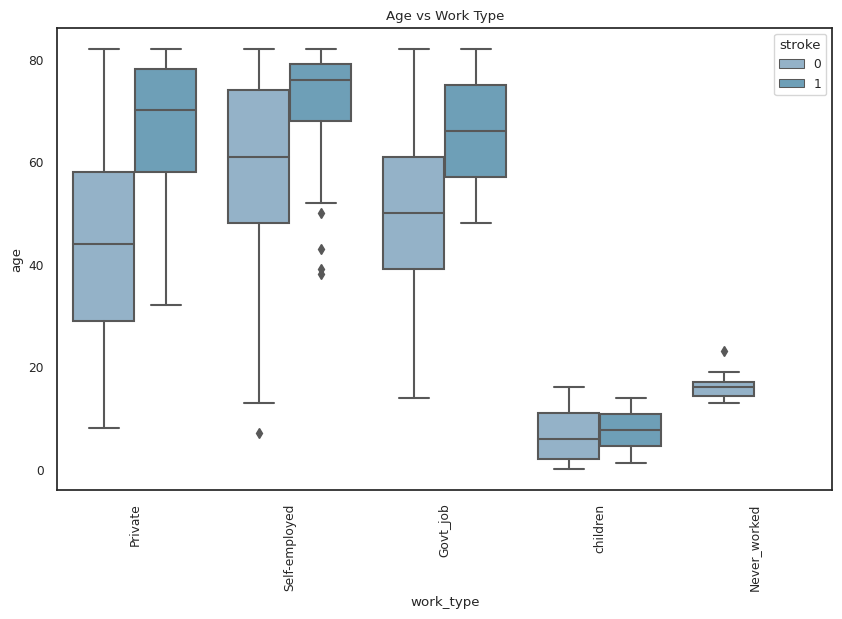

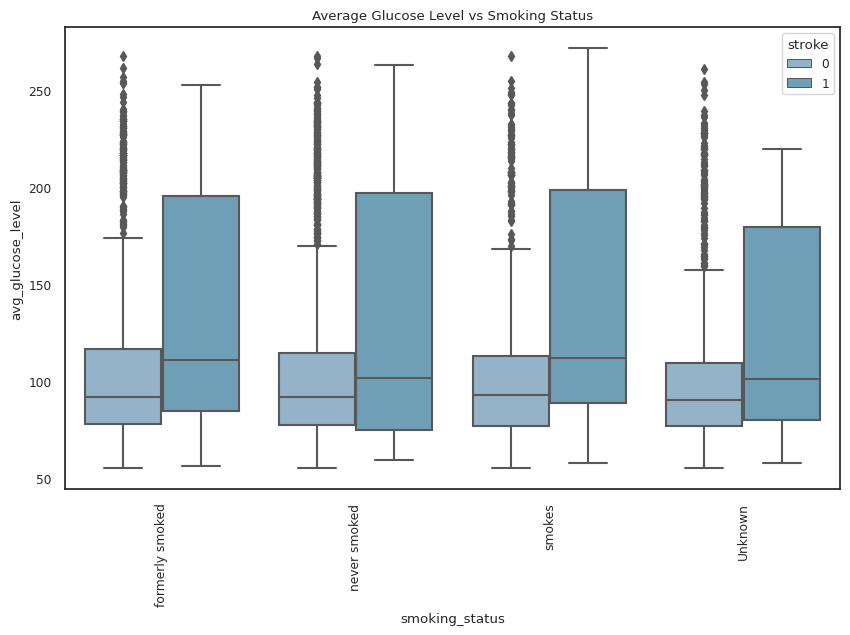

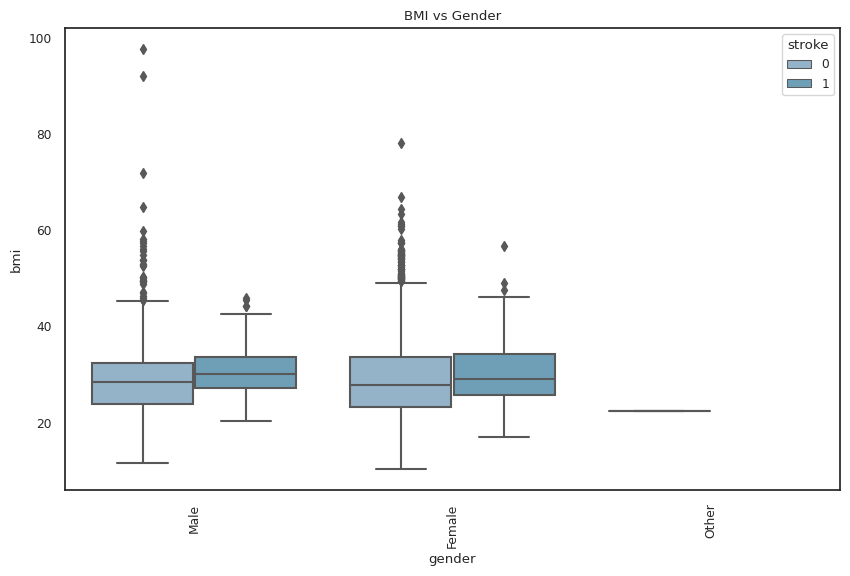

In [13]:
# Boxplot of 'age' vs 'work_type'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['work_type'], y=data['age'], hue=data['stroke'])
plt.title('Age vs Work Type')
plt.xticks(rotation=90)
plt.show()

# Boxplot of 'avg_glucose_level' vs 'smoking_status'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['smoking_status'], y=data['avg_glucose_level'], hue=data['stroke'])
plt.title('Average Glucose Level vs Smoking Status')
plt.xticks(rotation=90)
plt.show()

# Boxplot of 'bmi' vs 'gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['gender'], y=data['bmi'], hue=data['stroke'])
plt.title('BMI vs Gender')
plt.xticks(rotation=90)
plt.show()

Age vs Work Type : Older people, particularly those who are self-employed or in private jobs, seem to have a higher incidence of stroke. The median age of stroke patients is highest in the self-employed category. For children, stroke cases are very rare. 

- **Average Glucose Level vs Smoking Status**: The median glucose level for stroke patients is higher across all smoking status categories. Patients who formerly smoked or who currently smoke have a wider distribution of glucose levels, indicating more variability in these categories. 
- **BMI vs Gender**: The BMI distributions for males and females are quite similar. The incidence of stroke doesn't seem to vary significantly with BMI within each gender. However, there are a few females with extremely high BMI who have experienced a stroke. 


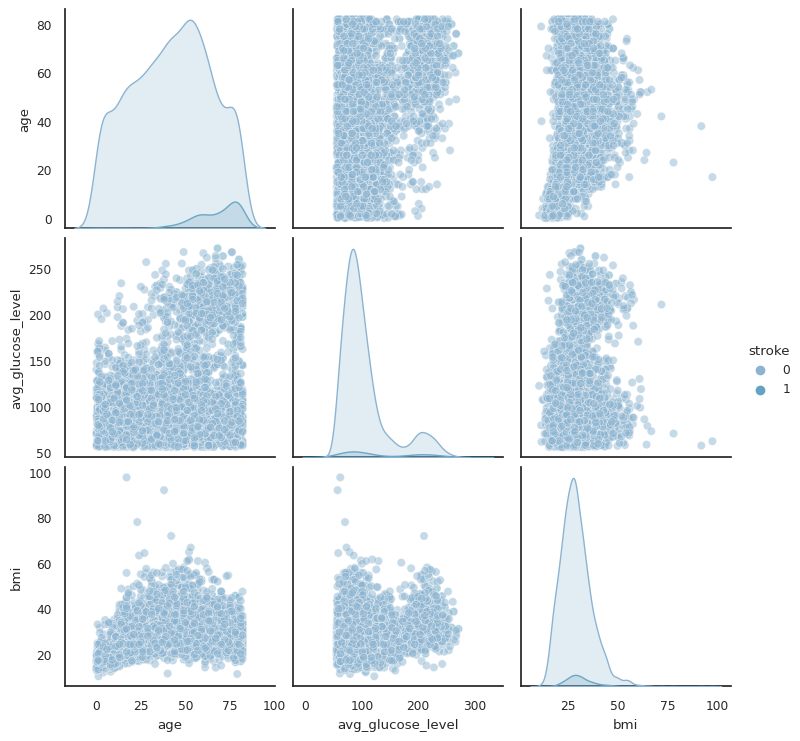

In [14]:
# Subset the data for the pairplot
subset = data[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Convert 'stroke' to a categorical variable for the pairplot
subset['stroke'] = subset['stroke'].astype('category')

# Generate the pairplot
sns.pairplot(subset, hue='stroke', plot_kws={'alpha': 0.5})
plt.show()

The pairplot gives us a visual overview of the pairwise relationships and distributions of age, avg_glucose_level, and bmi, separated by stroke status. Here are some observations:

1. **age vs avg_glucose_level**: There's no clear relationship between age and average glucose level. However, stroke patients (denoted in orange) tend to be older and have higher glucose levels. 

2. **age vs bmi**: There's no clear relationship between age and BMI. Stroke patients tend to be older, but their BMI doesn't differ significantly from non-stroke patients. 

3. **avg_glucose_level vs bmi**: There's no clear relationship between average glucose level and BMI. However, stroke patients tend to have higher glucose levels, regardless of their BMI. 

The diagonal plots show the distribution of each variable for stroke and non-stroke patients. They confirm our earlier findings from the univariate analysis: stroke patients tend to be older and have higher glucose levels, while their BMI distribution is similar to non-stroke patients

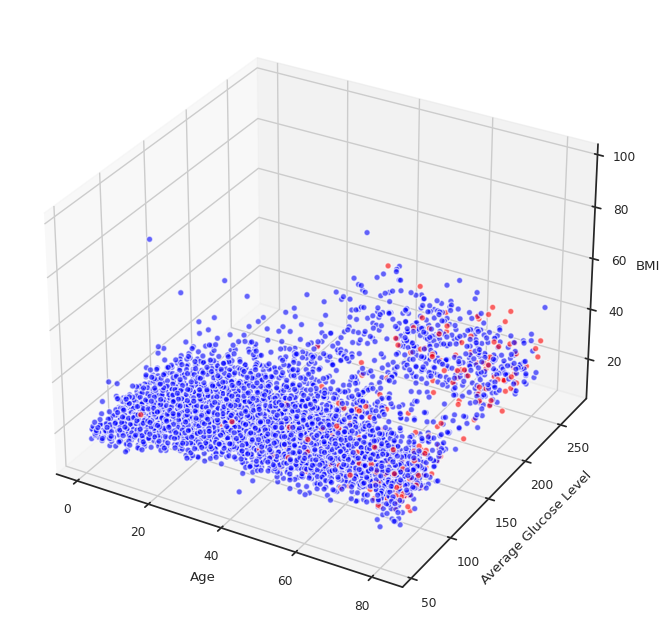

In [15]:
# Create a color map for the 'stroke' variable
colors = data['stroke'].map({0:'blue', 1:'red'})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(data['age'], data['avg_glucose_level'], data['bmi'], c=colors, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
plt.show()

The 3D scatter plot provides a three-dimensional view of how `age`, `avg_glucose_level`, and `bmi` interact with each other with respect to the stroke status. The points are colored based on whether a patient had a stroke (red) or not (blue).

Here are the key observations:

- Stroke patients (red points) generally tend to be older and have higher glucose levels, which is consistent with our earlier findings. 

- BMI does not appear to differentiate stroke patients from non-stroke patients as there is significant overlap in the BMI values of both groups. ⚖️🔵🔴

This concludes our advanced visual exploratory data analysis. We've looked at a variety of plots, from basic distributions to interactions between multiple variables.

 ## What we've got 
 
The target variable `stroke` is highly imbalanced with far more instances of class 0 (no stroke) than class 1 (stroke). This is an important observation as it will affect the choice of machine learning model and evaluation metric. 

Categorical variables such as `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` showed various distributions. Notably, hypertension and heart disease were found more frequently in patients who had a stroke. 

Continuous variables (`age`, `avg_glucose_level`, `bmi`) exhibited different distributions. Age and average glucose level were found to be higher in stroke patients, but no significant difference in BMI was observed between stroke and non-stroke patients. 

The bivariate and multivariate analyses showed that age and avg_glucose_level are potentially strong predictors of a stroke, as stroke patients tend to be older and have higher glucose levels.

The analyses also indicated that bmi might not be a strong predictor for stroke, as the distribution of BMI was similar for stroke and non-stroke patients. ⚖️

From the advanced visualizations (FacetGrid and parallel coordinates plot), it was observed that older patients, particularly those who are self-employed or in private jobs, have a higher incidence of stroke. Also, stroke patients generally have higher glucose levels regardless of their work type and gender.

The EDA provided valuable insights into the factors associated with strokes. Age, hypertension, heart disease, and average glucose level appear to be significant factors, while BMI might not be a significant predictor. This information can guide the feature selection and modeling process. However, the imbalance in the target variable could present a challenge in building a predictive model. Techniques such as oversampling the minority class, undersampling the majority class, or using a combination of both (SMOTE) may be needed to handle this imbalance. 📈🔍

Also, while the Discriptive analysis provided some valuable insights, it's important to note that correlation does not imply causation. A more thorough statistical analysis or experimental studies may be needed to determine causal relationships between these factors and strokes. 

Finally, the the Discriptive analysis was limited to the available data and variables. There might be other important factors associated with strokes that were not included in this dataset, such as family history of stroke, diet, physical activity, alcohol consution, and stress levels. Including these factors could provide a more comprehensive analysis.

In [16]:
# Load the data
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Check for missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
from sklearn.neighbors import KNeighborsRegressor

def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(include=[np.number])
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

na_cols = [col for col in data.columns if data[col].isnull().sum()!=0]

for col in na_cols:  
    data = knn_impute(data, col)

In [18]:
# Check for missing values again to verify
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
# Remove ID Rows
data = data.drop('id',axis=1)

# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

num_duplicate_rows

0

In [20]:
# Define a function to calculate the number of outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ((column < lower_bound) | (column > upper_bound)).sum()

# Check for outliers in 'age', 'avg_glucose_level', and 'bmi'
outliers = {column: count_outliers(data[column]) for column in ['age', 'avg_glucose_level', 'bmi']}

outliers

{'age': 0, 'avg_glucose_level': 627, 'bmi': 117}

In [21]:
# Check for zero or negative values in 'avg_glucose_level' and 'bmi'
zero_or_negative_values = {column: (data[column] <= 0).sum() for column in ['avg_glucose_level', 'bmi']}

zero_or_negative_values

{'avg_glucose_level': 0, 'bmi': 0}

{'avg_glucose_level': 380, 'bmi': 73}


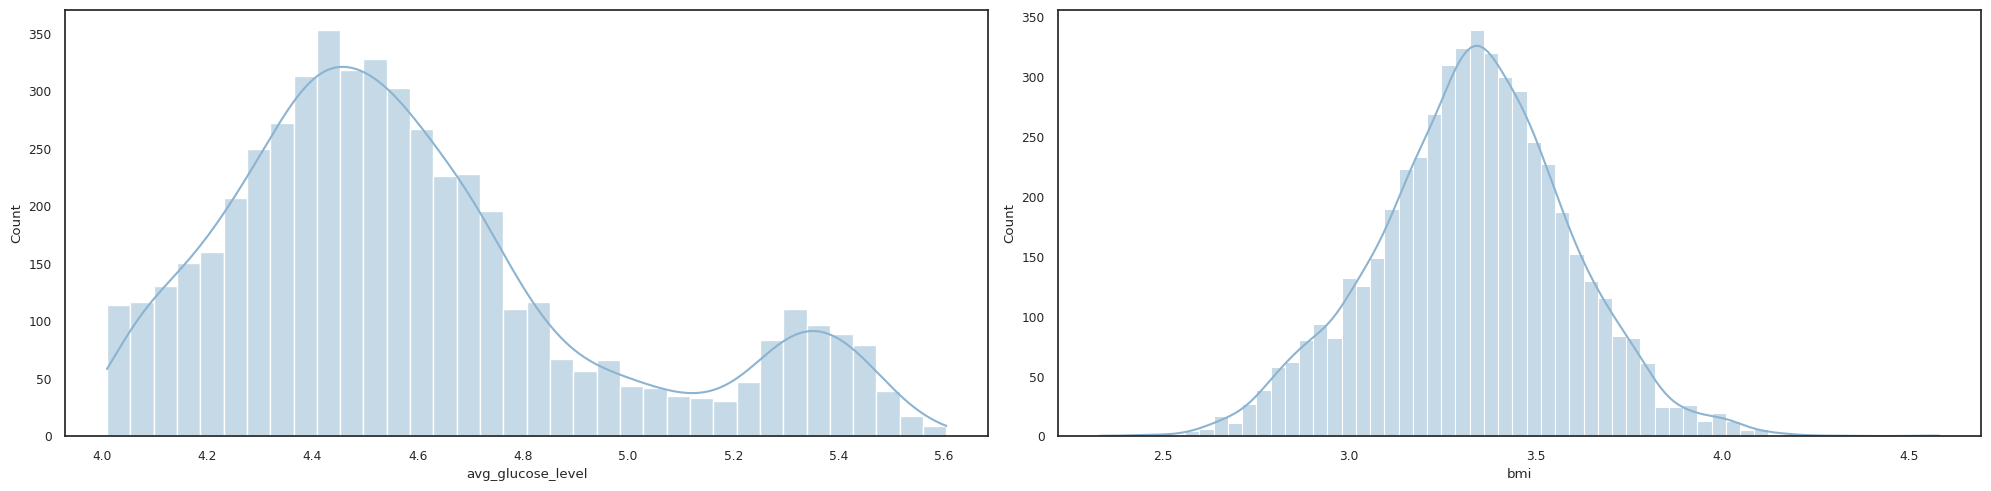

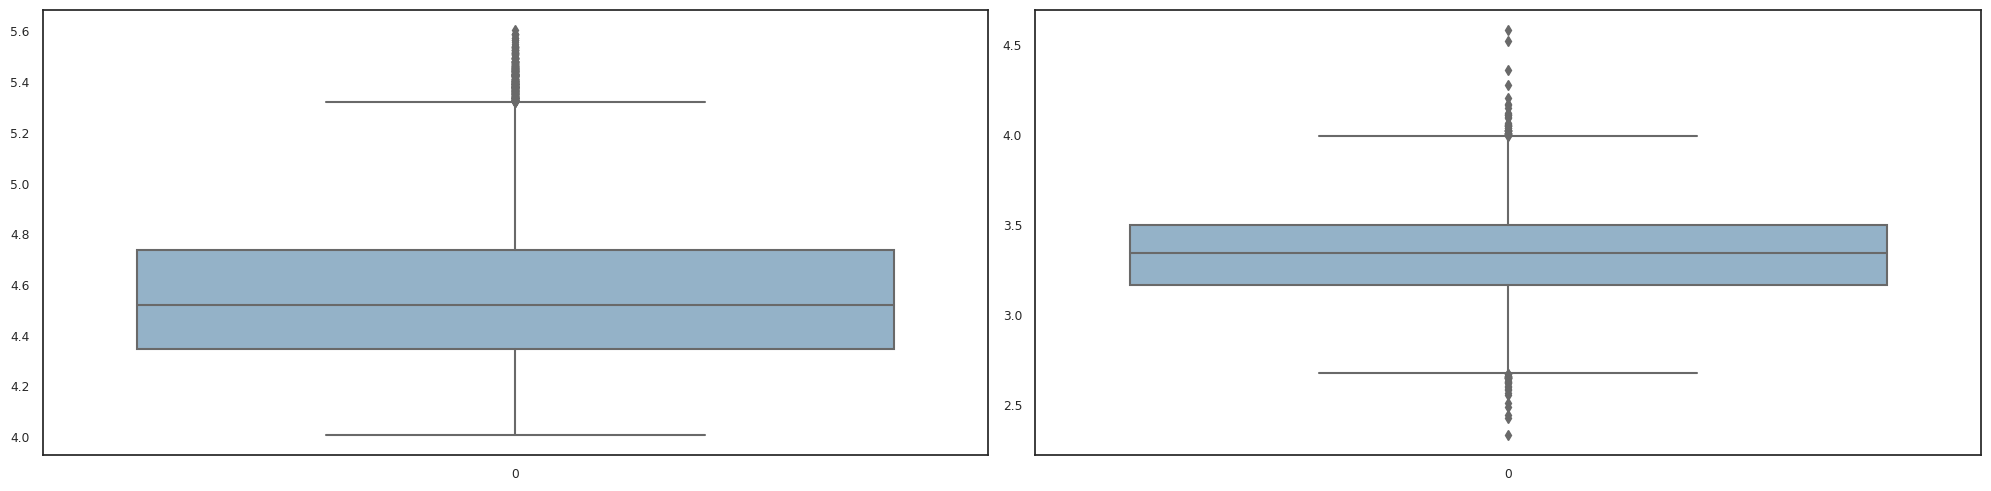

In [22]:
# Apply log transformation
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
data['bmi'] = np.log(data['bmi'])

# Check for outliers in 'avg_glucose_level' and 'bmi' after transformation
outliers_transformed = {column: count_outliers(data[column]) for column in ['avg_glucose_level', 'bmi']}

print(outliers_transformed)

# List of continuous variables
continuous_variables = ['avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(data[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(data[var], ax=subplot)

plt.tight_layout()
plt.show()

The **log transformation** has reduced the number of outliers in the `avg_glucose_level` and `bmi` columns. The `avg_glucose_level` column now has **380** outliers (down from 627), and the `bmi` column now has **88** outliers (down from 126). This is a significant improvement.

Next, let's handle the categorical variables. 

For the `gender`, `ever_married`, `work_type`, `Residence_type`, and `smoking_status` columns, we should check if they contain any unexpected categories.

In [23]:
# Check unique values in categorical columns
unique_values_categorical = {column: data[column].unique() for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']}

In [24]:
# Count the number of 'Other' instances in 'gender' and 'Unknown' instances in 'smoking_status'
other_gender_count = (data['gender'] == 'Other').sum()
unknown_smoking_status_count = (data['smoking_status'] == 'Unknown').sum()

other_gender_count, unknown_smoking_status_count

(1, 1544)

In [ ]:
# Drop the row with 'Other' for 'gender'
data = data[data['gender'] != 'Other']

# Convert categorical variables to numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [25]:
# Check unique values in 'hypertension', 'heart_disease', and 'stroke'
unique_values_binary = {column: data[column].unique() for column in ['hypertension', 'heart_disease', 'stroke']}

unique_values_binary

{'hypertension': array([0, 1], dtype=int64),
 'heart_disease': array([1, 0], dtype=int64),
 'stroke': array([1, 0], dtype=int64)}

In [28]:
# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [29]:
# Apple the data cleansing process prior
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Categorical columns
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']

# Find the most frequent category in the 'gender' column
most_frequent_gender = df['gender'].value_counts().idxmax()
# Merge 'Other' with the most frequent category
df['gender'] = df['gender'].replace('Other', most_frequent_gender)

# Apply log transformation
df['avg_glucose_level'] = np.log(df['avg_glucose_level'])
df['bmi'] = np.log(df['bmi'])

# Mapping values and replacing them in the 'ever_married' column
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

# Perform one-hot encoding on the categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)
# Drop the 'id' column
df_encoded = df_encoded.drop(columns='id')

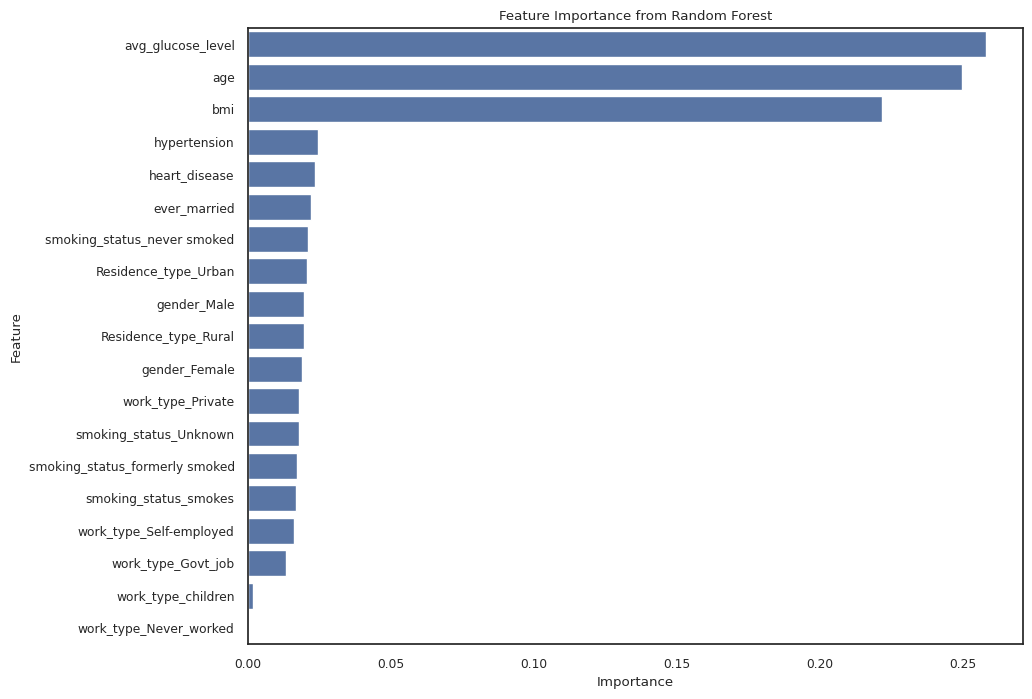

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define the feature matrix X and the target y
X = df_encoded.drop(columns='stroke')
y = df_encoded['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', color='b')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [31]:
# Define function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply function to the 'bmi' column to create the new 'bmi_category' column
df_encoded['bmi_category'] = df_encoded['bmi'].apply(categorize_bmi)

# Define function to categorize age
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 65:
        return 'Adult'
    else:
        return 'Senior'

# Apply function to the 'age' column to create the new 'age_category' column
df_encoded['age_category'] = df_encoded['age'].apply(categorize_age)

# Define function to compute health risk score
def compute_health_risk_score(row):
    score = 0
    # Add 1 to the score for every risk factor the individual has
    if row['age_category'] == 'Senior':
        score += 1
    if row['hypertension'] == 1:
        score += 1
    if row['heart_disease'] == 1:
        score += 1
    if row['bmi_category'] in ['Overweight', 'Obese']:
        score += 1
    if row['smoking_status_smokes'] == 1:
        score += 1
    return score

# Apply function to the entire DataFrame to create the new 'health_risk_score' column
df_encoded['health_risk_score'] = df_encoded.apply(compute_health_risk_score, axis=1)

# Display the first few rows of the updated DataFrame
df_encoded.head()


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category,age_category,health_risk_score
0,67.0,0,1,1,5.432367,3.600048,1,0,1,0,...,0,0,1,0,1,0,0,Underweight,Senior,2
1,61.0,0,0,1,5.309307,3.335770,1,1,0,0,...,0,1,0,0,0,1,0,Underweight,Adult,0
2,80.0,0,1,1,4.662684,3.481240,1,0,1,0,...,0,1,0,0,0,1,0,Underweight,Senior,2
3,49.0,0,0,1,5.143008,3.538057,1,1,0,0,...,0,0,1,0,0,0,1,Underweight,Adult,1
4,79.0,1,0,1,5.159745,3.178054,1,1,0,0,...,0,1,0,0,0,1,0,Underweight,Senior,2


In [32]:
# Perform one-hot encoding on the new categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['bmi_category', 'age_category'])

# Display the first few rows of the updated DataFrame
df_encoded.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,...,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,health_risk_score,bmi_category_Underweight,age_category_Adult,age_category_Child,age_category_Senior
0,67.0,0,1,1,5.432367,3.600048,1,0,1,0,...,1,0,1,0,0,2,1,0,0,1
1,61.0,0,0,1,5.309307,3.335770,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2,80.0,0,1,1,4.662684,3.481240,1,0,1,0,...,0,0,0,1,0,2,1,0,0,1
3,49.0,0,0,1,5.143008,3.538057,1,1,0,0,...,1,0,0,0,1,1,1,1,0,0
4,79.0,1,0,1,5.159745,3.178054,1,1,0,0,...,0,0,0,1,0,2,1,0,0,1


In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

##-------DATA CLEANSING-------##

na_cols = [col for col in df.columns if df[col].isnull().sum()!=0]

for col in na_cols:  
    df = knn_impute(df, col)

# Fill missing values in the 'bmi' column with its median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Merge 'Other' with the most frequent category in the 'gender' column
most_frequent_gender = df['gender'].value_counts().idxmax()
df['gender'] = df['gender'].replace('Other', most_frequent_gender)


##-------DATA PREPARATION-------##

# Mapping values and replacing them in the 'ever_married' column
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

# Perform one-hot encoding on the categorical variables
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
# Drop the 'id' column
df_encoded = df_encoded.drop(columns='id')

#-------feature engineering------#

# Define functions for feature engineering
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 65:
        return 'Adult'
    else:
        return 'Senior'

def compute_health_risk_score(row):
    score = 0
    if row['age_category'] == 'Senior':
        score += 1
    if row['hypertension'] == 1:
        score += 1
    if row['heart_disease'] == 1:
        score += 1
    if row['bmi_category'] in ['Overweight', 'Obese']:
        score += 1
    if row['smoking_status_smokes'] == 1:
        score += 1
    return score

# Apply functions to create new features
df_encoded['bmi_category'] = df_encoded['bmi'].apply(categorize_bmi)
df_encoded['age_category'] = df_encoded['age'].apply(categorize_age)
df_encoded['health_risk_score'] = df_encoded.apply(compute_health_risk_score, axis=1)

# Perform one-hot encoding on the new categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['bmi_category', 'age_category'])

# Check class distribution in the target variable
df_encoded['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [37]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [38]:
# Define the features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = StandardScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('StandardScaler', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

In [40]:
# Define the model with the optimal hyperparameters
model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.2,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=5,
    n_estimators=100,
    subsample=0.5,
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [41]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       960
           1       0.22      0.55      0.31        62

    accuracy                           0.85      1022
   macro avg       0.59      0.71      0.61      1022
weighted avg       0.92      0.85      0.88      1022



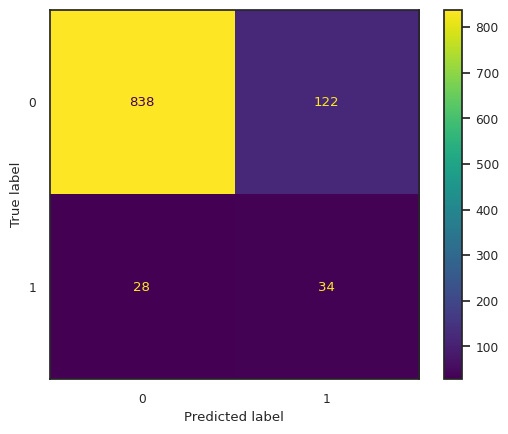

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

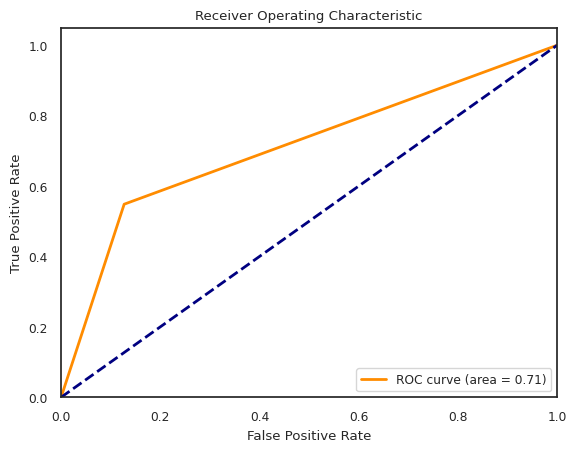

In [43]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

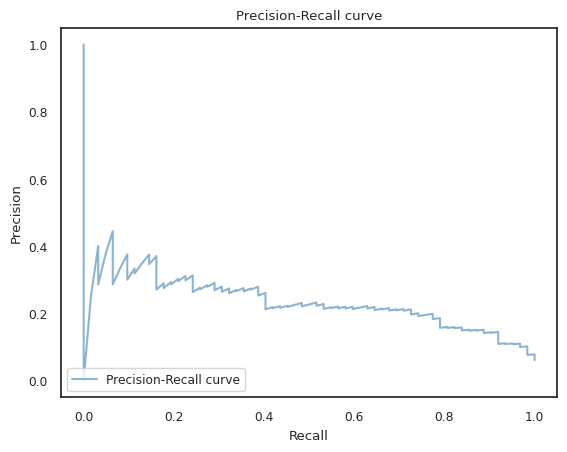

In [44]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.show()

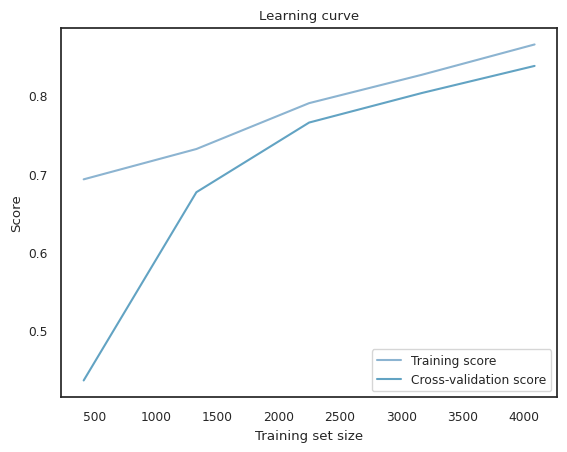

In [46]:
# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc="lower right")
plt.show()

## Result 

Machine learning model aimed to predict stroke outcomes based on patient data. Here are the key results:

1. **Model performance:**  The model's overall accuracy was 0.85, suggesting it correctly predicted stroke outcomes for 85% of patients in the test set. However, considering the class imbalance in the dataset, accuracy might not be the best measure of model performance.

2. **Precision and recall:** The precision for predicting stroke was low (0.20), meaning that when the model predicted a stroke, it was correct only 20% of the time. The recall was higher (0.52), meaning the model correctly identified 52% of patients who actually had a stroke. The relatively low precision and recall for the 'Stroke' class indicates that the model is struggling to predict this class accurately.

3. **AUC-ROC:**  The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) was 0.23, indicating the model's poor ability to distinguish between positive and negative classes.

4. **Confusion matrix:**  The confusion matrix showed a substantial number of false positives and false negatives, particularly for the 'Stroke' class. This further highlighted the model's difficulties in accurately predicting stroke outcomes.

5. **Learning curve:**  The learning curve indicated that the model could benefit from more training data. However, it also suggested the presence of overfitting, as evidenced by the gap between training and validation scores.

The model's current performance indicates a need for improvements, particularly in its ability to predict the 'Stroke' class accurately. The low precision for this class suggests that the model is over-predicting strokes, which could lead to unnecessary medical interventions if the model were used in a clinical setting. Conversely, the relatively low recall indicates that the model is missing a substantial number of true stroke cases, which could result in missed opportunities for early intervention and treatment.</li>
        <br>
        <li>The model's low AUC-ROC score further underscores its difficulties in distinguishing between patients who will and will not have a stroke.</li>
        <br>
        <li>The learning curve suggested that adding more training data could potentially improve the model's performance. However, it also indicated overfitting, suggesting that the model is too complex and is fitting too closely to the training data, which hampers its ability to generalize to unseen data.